In [34]:
from pathlib import Path

import matplotlib.pyplot as plt

import seaborn as sns
from tqdm.notebook import tqdm
from collections import namedtuple

from eval import read_run_dir
from new_eval import new_get_run_metrics, get_config
from plot_utils import basic_plot

%matplotlib inline
%load_ext autoreload
%autoreload 2
sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

models_dir = Path("../models")
device = "cpu" # Set to "cuda" if needed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
df = read_run_dir(models_dir)
df  # list all the runs in our run_dir

['chebyshev_linear_regression_toy' 'curriculum' 'lora_testing_degree'
 'lora_testing_shared_roots' 'prompting_degree' 'prompting_shared_roots']
                                 run_id                      task  \
1  6384e30d-a77e-4846-b6ee-d50b026ebcd1            soft_prompting   
4  b1aa1188-5782-4e7b-9bd9-3d7949a6600c  kernel_linear_regression   
5                   small-1-11-5M-steps  kernel_linear_regression   
3                                model1  kernel_linear_regression   
6                                   old  kernel_linear_regression   
7  7f3d8135-fcb1-4f82-bed6-041508e56589                      lora   
8  f214d84d-3dad-4326-aa86-5dd04b09ae53                      lora   
0  49c6a6c8-435d-4096-a5a9-45d86c10fd23            soft_prompting   
2  6da1d7cd-bc48-4b91-9809-c0e0e59ecd06            soft_prompting   

                             model  \
1  chebyshev_linear_regression_toy   
4                Transformer-small   
5                Transformer-small   
3            

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
1,6384e30d-a77e-4846-b6ee-d50b026ebcd1,soft_prompting,chebyshev_linear_regression_toy,basis_dim=5_degree=5,-1,-1,1,6,4,chebyshev_linear_regression_toy
4,b1aa1188-5782-4e7b-9bd9-3d7949a6600c,kernel_linear_regression,Transformer-small,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,6,4,chebyshev_linear_regression_toy
5,small-1-11-5M-steps,kernel_linear_regression,Transformer-small,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,6,4,chebyshev_linear_regression_toy
3,model1,kernel_linear_regression,Transformer-plus,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,24,16,curriculum
6,old,kernel_linear_regression,Transformer-plus,basis_dim=11_different_degrees=True_lowest_deg...,-1,-1,1,24,16,curriculum
7,7f3d8135-fcb1-4f82-bed6-041508e56589,lora,lora_testing_degree,basis_dim=5_different_degrees=False_highest_de...,-1,-1,1,6,4,lora_testing_degree
8,f214d84d-3dad-4326-aa86-5dd04b09ae53,lora,lora_testing_shared_roots,basis_dim=5_degree=5,-1,-1,1,6,4,lora_testing_shared_roots
0,49c6a6c8-435d-4096-a5a9-45d86c10fd23,soft_prompting,prompting_degree,basis_dim=5_different_degrees=False_highest_de...,-1,-1,1,6,4,prompting_degree
2,6da1d7cd-bc48-4b91-9809-c0e0e59ecd06,soft_prompting,prompting_shared_roots,basis_dim=5_degree=5,-1,-1,1,6,4,prompting_shared_roots


../models/lora/7f3d8135-fcb1-4f82-bed6-041508e56589/config.yaml
../models/soft_prompting/49c6a6c8-435d-4096-a5a9-45d86c10fd23/config.yaml
../models/kernel_linear_regression/small-1-11-5M-steps/config.yaml


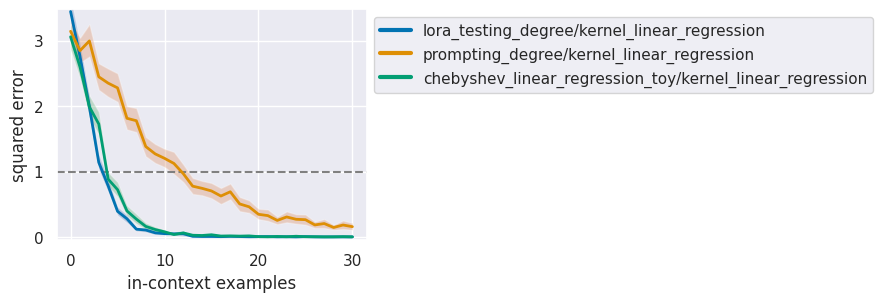

../models/lora/f214d84d-3dad-4326-aa86-5dd04b09ae53/config.yaml
../models/soft_prompting/6da1d7cd-bc48-4b91-9809-c0e0e59ecd06/config.yaml
../models/kernel_linear_regression/small-1-11-5M-steps/config.yaml


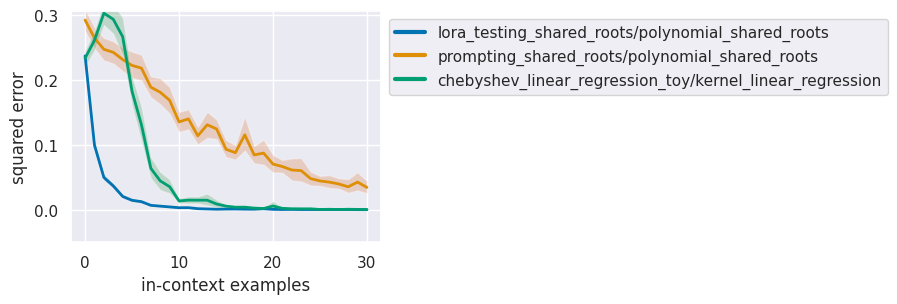

In [40]:
load_info = namedtuple("load_info", ["path", "step"])

def plot_collection(load_info_collection, device="cuda", alternative_train_conf_path=None):

    metrics = {}
    for path, step in load_info_collection:
        conf = get_config(path / "config.yaml")
        metrics[conf.wandb.name + "/" + conf.training.task] = new_get_run_metrics(path, step=step, include_noise=False, device=device, 
                                                                                  alternative_train_conf_path=alternative_train_conf_path)

    basic_plot(metrics)
    plt.show()

load_info_collection = [ load_info(path=models_dir / "lora" / "7f3d8135-fcb1-4f82-bed6-041508e56589", step=4000),
                         load_info(path=models_dir / "soft_prompting" / "49c6a6c8-435d-4096-a5a9-45d86c10fd23", step=4000),
                         load_info(path=models_dir / "kernel_linear_regression" / "small-1-11-5M-steps", step=5000000)]

plot_collection(load_info_collection, device=device, alternative_train_conf_path=load_info_collection[0].path / "config.yaml")


load_info_collection = [ load_info(path=models_dir / "lora" / "f214d84d-3dad-4326-aa86-5dd04b09ae53", step=4000),
                         load_info(path=models_dir / "soft_prompting" / "6da1d7cd-bc48-4b91-9809-c0e0e59ecd06", step=4000),
                         load_info(path=models_dir / "kernel_linear_regression" / "small-1-11-5M-steps", step=5000000)]

plot_collection(load_info_collection, device=device, alternative_train_conf_path=load_info_collection[0].path / "config.yaml")
    
    